In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
import pandas as pd

In [140]:
t=time.time()
X = np.array(pd.read_csv("train.csv",header=None)).astype("float32")
#X=X[:,:]
X_=np.matrix.transpose(X)
print(time.time()-t)

261.56814217567444


In [141]:
print(np.shape(X))

(330000, 1728)


In [143]:
lambd,W=np.linalg.eig(np.matmul(X_,X))

In [144]:
print(lambd,W)

[  8.81251200e+07   1.37556540e+07   1.33284240e+07 ...,   3.10467505e+03
   3.11016968e+03   3.11723218e+03] [[  5.68875948e-05  -2.11760029e-02  -3.09563857e-02 ...,  -1.31373238e-02
    1.21432999e-02   2.03688983e-02]
 [ -2.22705698e-04   4.46923962e-03  -2.33538933e-02 ...,  -1.96297262e-02
   -6.20046770e-03   7.48627186e-02]
 [  4.14250903e-02  -2.91852467e-02   1.71769671e-02 ...,   6.10595895e-03
    1.67119857e-02  -3.07125202e-03]
 ..., 
 [  4.29302949e-04  -5.26509434e-03   1.02723679e-02 ...,  -5.09626456e-02
    7.38581270e-03   3.16366367e-02]
 [  1.22754835e-04   2.01201905e-02   1.83168575e-02 ...,   6.15180433e-02
   -1.84310991e-02   4.80915494e-02]
 [  4.14854735e-02  -2.78680082e-02   4.70220819e-02 ...,  -2.62619350e-02
    4.31245472e-03   8.18284694e-03]]


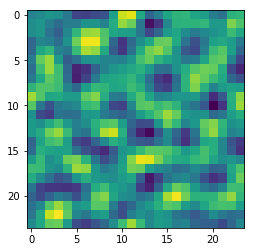

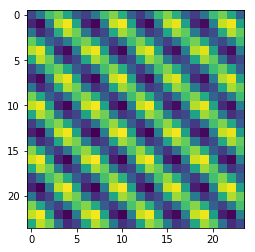

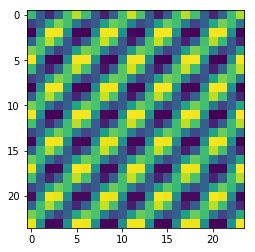

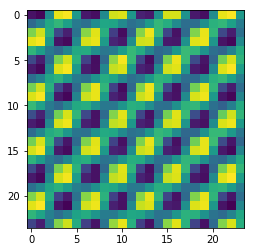

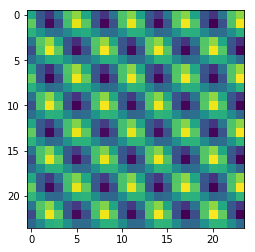

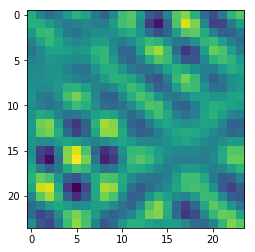

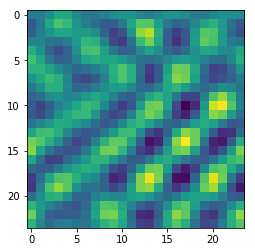

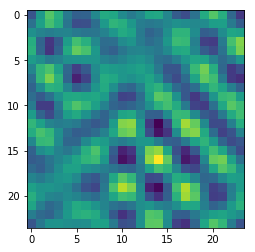

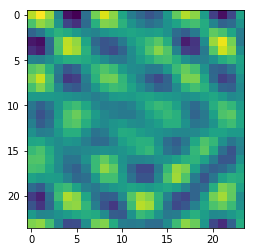

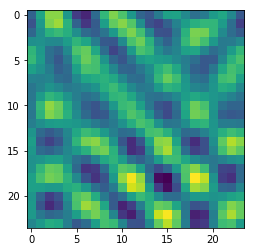

In [162]:
for i in range(10):
    plt.imshow(np.reshape(W[:,i],(24,24,3))[:,:,2])
    plt.show()

In [145]:
Y=np.zeros((5,np.shape(X)[0]))
for i in range(5):
    Y[i,:]=np.matmul(X,W[i,:])

In [ ]:
#Measuring centre of distribution of each phase
k=110000
c1=np.mean(Y[:,:k],axis=1)
c2=np.mean(Y[:,k:2*k],axis=1)
c3=np.mean(Y[:,2*k:],axis=1)
print(c1,c2,c3)

In [ ]:
#Distance between centres
print(np.sum((c1-c2)**2)**(0.5))
print(np.sum((c1-c3)**2)**(0.5))
print(np.sum((c2-c3)**2)**(0.5))

In [ ]:
#Angle between c1c2 and c1c3 vector. Proving that c1,c2,c3 lie on line that I call the principal axis
d1=np.sum((c1-c2)**2)**(0.5)
d2=np.sum((c1-c3)**2)**(0.5)
a=np.reshape(c3-c1,(5,1))
b=np.reshape(c2-c1,(5,1))
print(np.arccos(np.sum(a*b)/(d1*d2)))
print(c3-c1)

In [ ]:
#Average radius of distribution of three phases (Measuring spread)
c1=np.reshape(c1,(5,1))
r1=(np.sum((Y[:,:k]-c1)**2,axis=0))**(0.5)
print(np.mean(r1))

c2=np.reshape(c2,(5,1))
r2=(np.sum((Y[:,k:2*k]-c2)**2,axis=0))**(0.5)
print(np.mean(r2))

c3=np.reshape(c3,(5,1))
r3=(np.sum((Y[:,2*k:]-c3)**2,axis=0))**(0.5)
print(np.mean(r3))

In [ ]:
#Spread along principal axis
c1=np.reshape(c1,(5,1))
r1=np.sum((Y[:,:k]-c1)*(c3-c1),axis=0)
print(np.mean(np.abs(r1)))

c2=np.reshape(c2,(5,1))
r2=np.sum((Y[:,k:2*k]-c2)*(c3-c1),axis=0)
print(np.mean(np.abs(r2)))

c3=np.reshape(c3,(5,1))
r3=np.sum((Y[:,2*k:]-c3)*(c3-c1),axis=0)
print(np.mean(np.abs(r3)))

In [ ]:
plt.plot(Y[0,:])

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

col=['r','g','b']
for i in range(3):
    x=[]
    y=[]
    z=[]
    k=110000
    x=np.append(x,Y[0,i*k+50000:i*k+51000])
    y=np.append(y,Y[1,i*k+50000:i*k+51000])
    z=np.append(z,Y[2,i*k+50000:i*k+51000])
    ax.scatter(x,y,z, c=col[i], marker='.')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

In [ ]:
p=np.reshape(W[0,:576],(24,24))
plt.imshow(p)
plt.show()

In [ ]:
plt.plot(W[0,:])
plt.show()

In [ ]:
plt.plot(np.log10(lambd[:10]))
print(np.log10(lambd[:20]))
plt.show()